# Rain Prediction in Australia

Data set downloaded from the following Kaggle page, where the source of data is mentioned:
https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting the default figure size

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 200

In [4]:
df = pd.read_csv('weatherAUS.csv')   # reading the dataset

In [5]:
df.isnull().sum()   # checking the number of null values in each columns

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
# lets drop rows which have NaN values in target column

df = df.dropna(subset=['RainTomorrow'])

In [7]:
df.shape

(142193, 23)

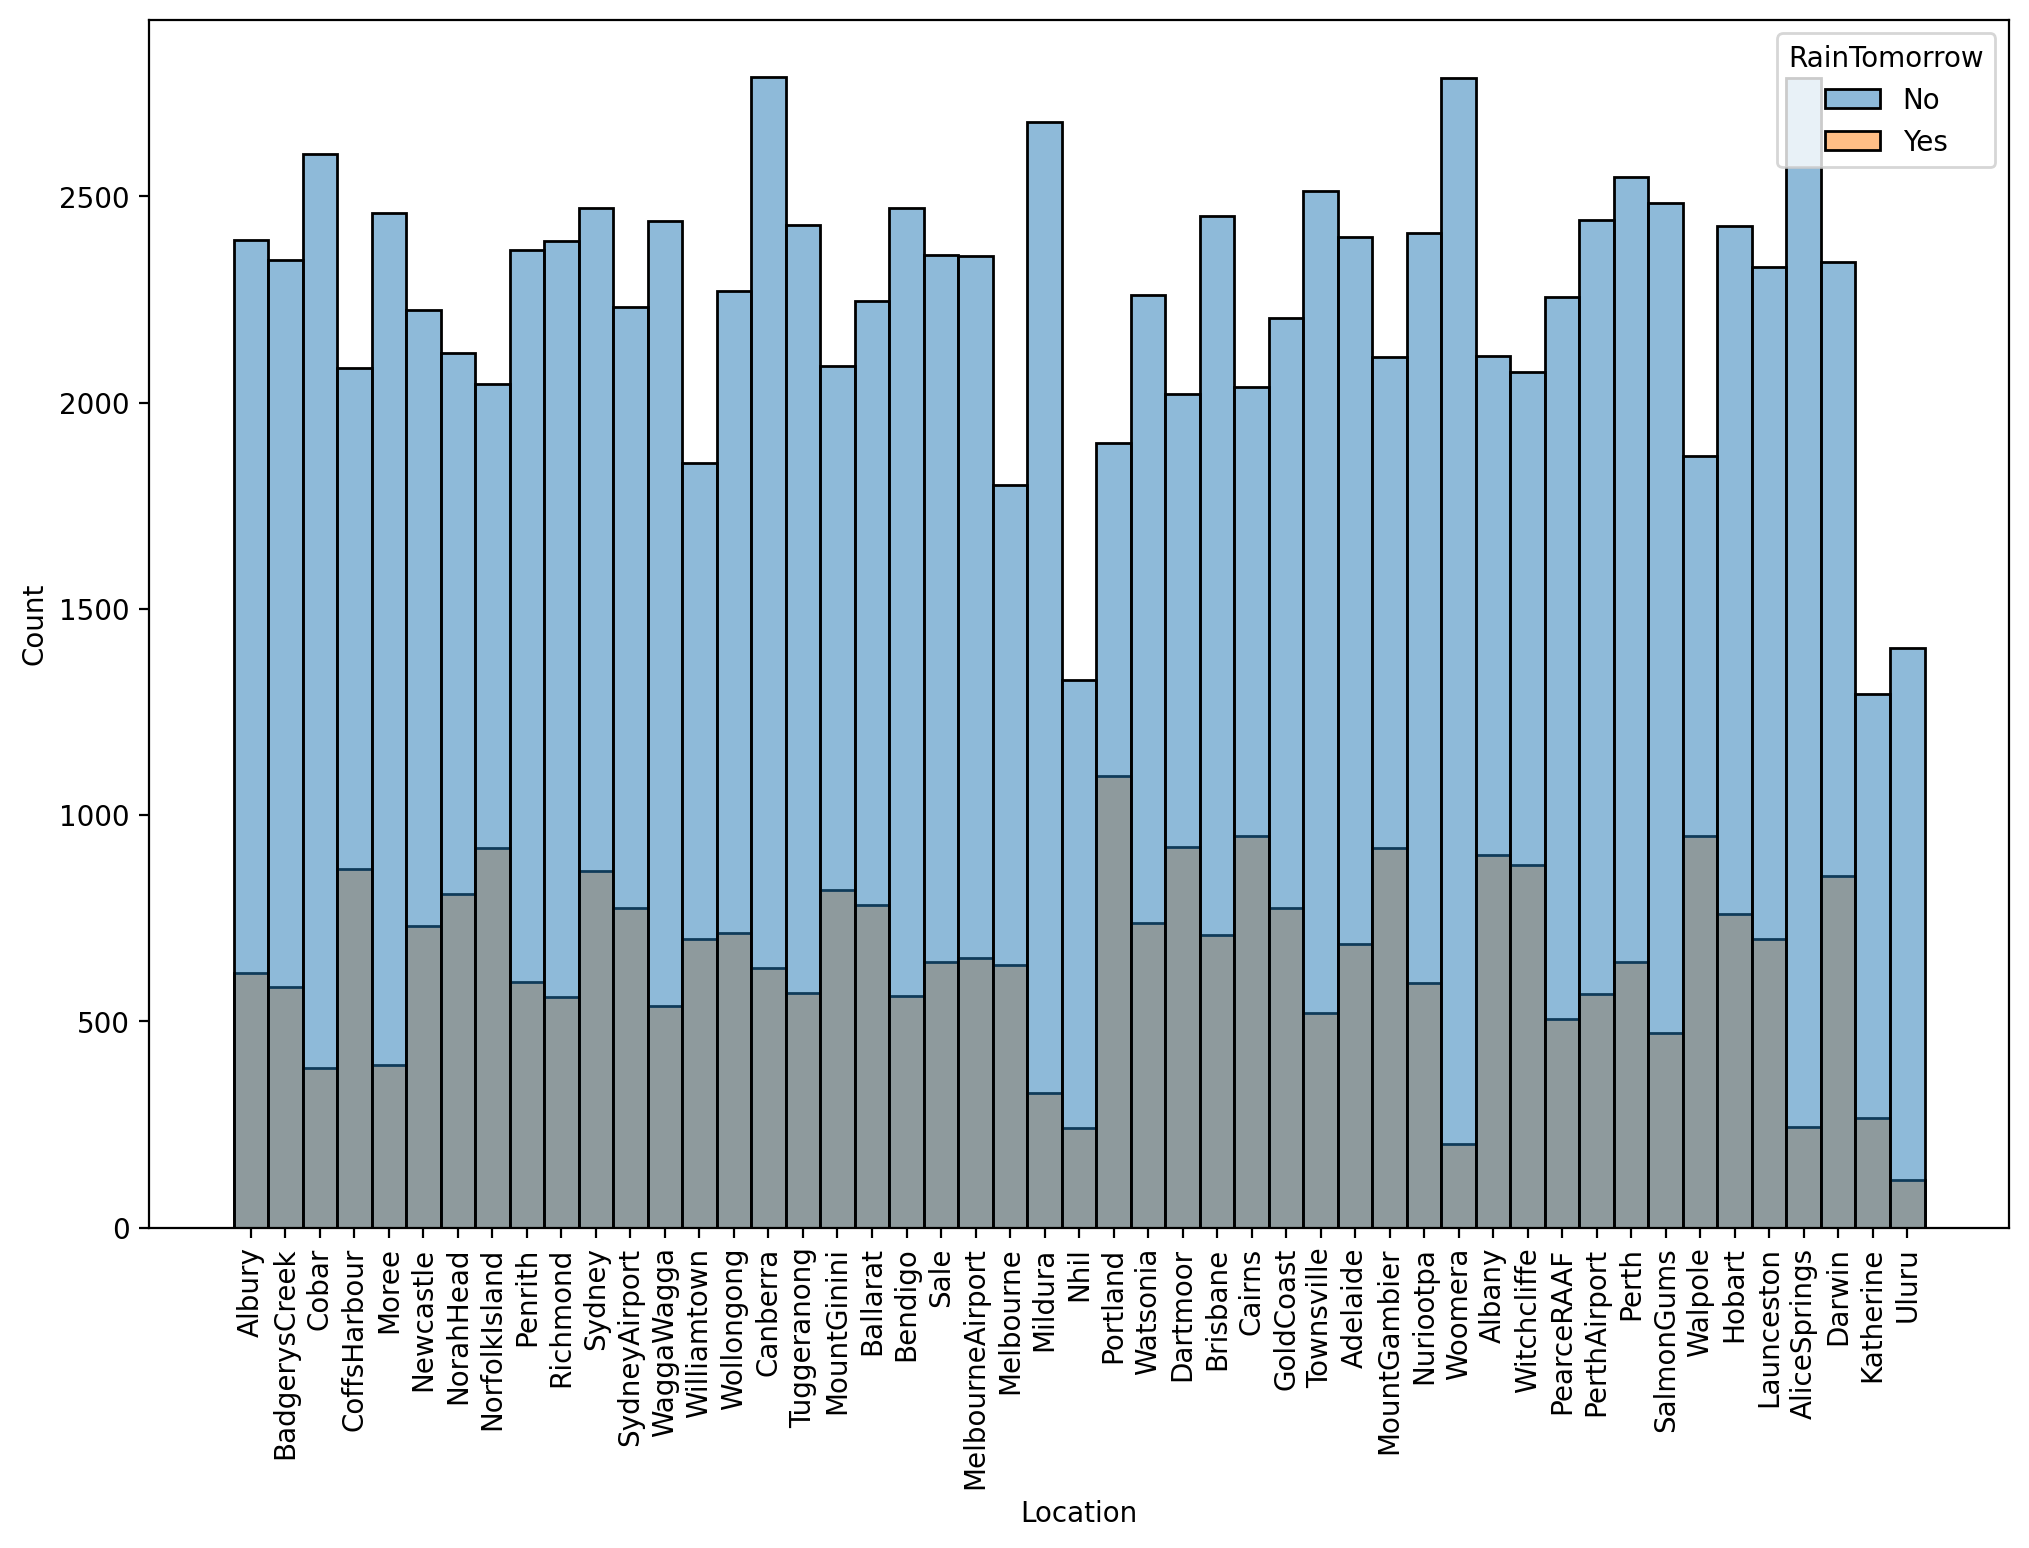

In [8]:
sns.histplot(data=df,x='Location',hue='RainTomorrow')
plt.xticks(rotation=90);

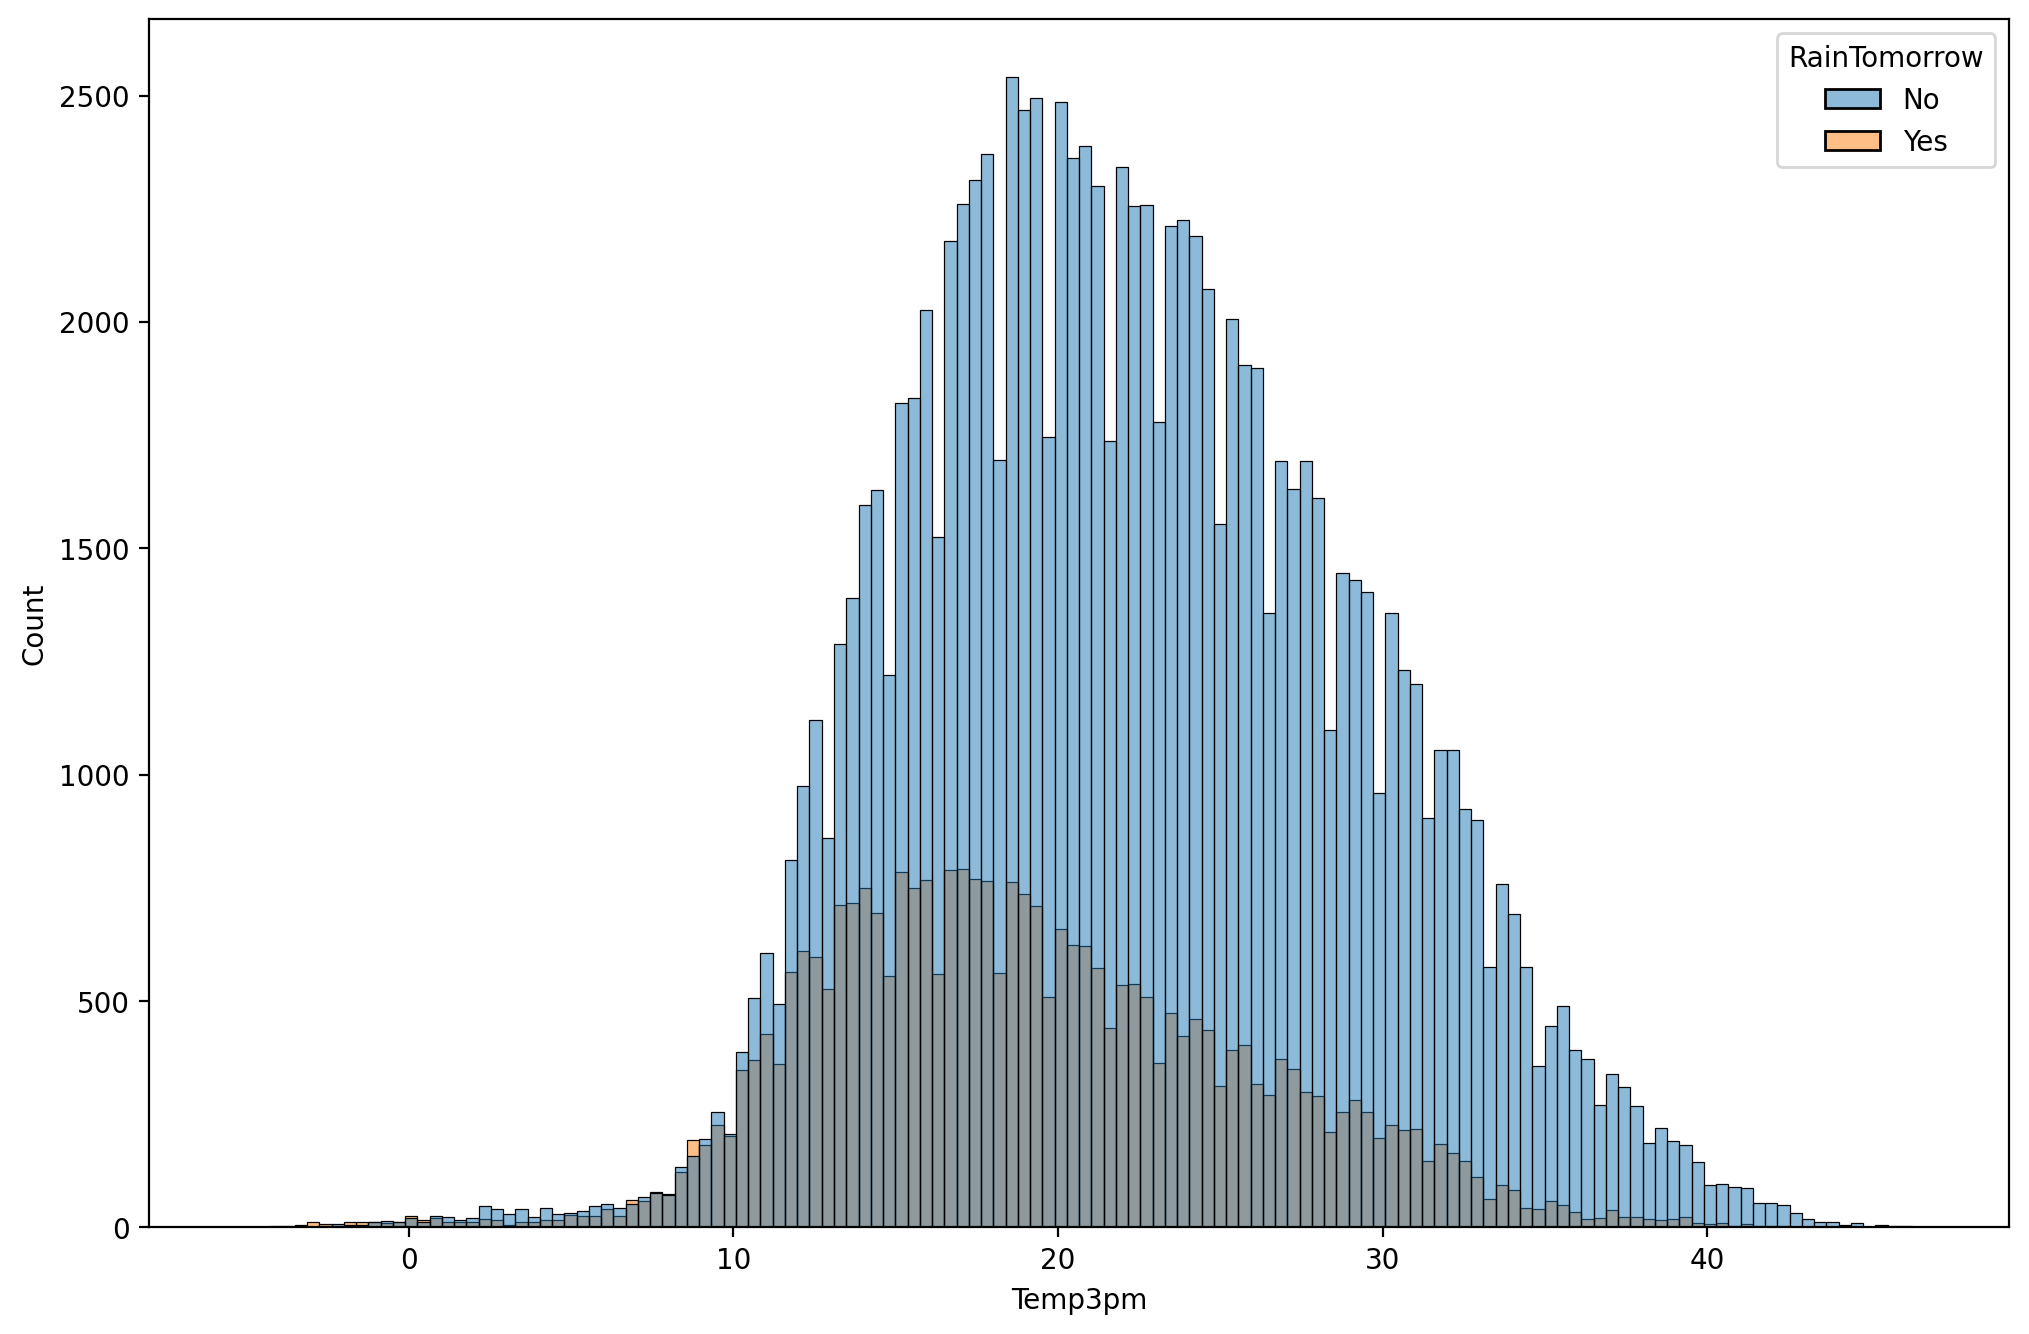

In [9]:
sns.histplot(data=df,x='Temp3pm',hue='RainTomorrow');

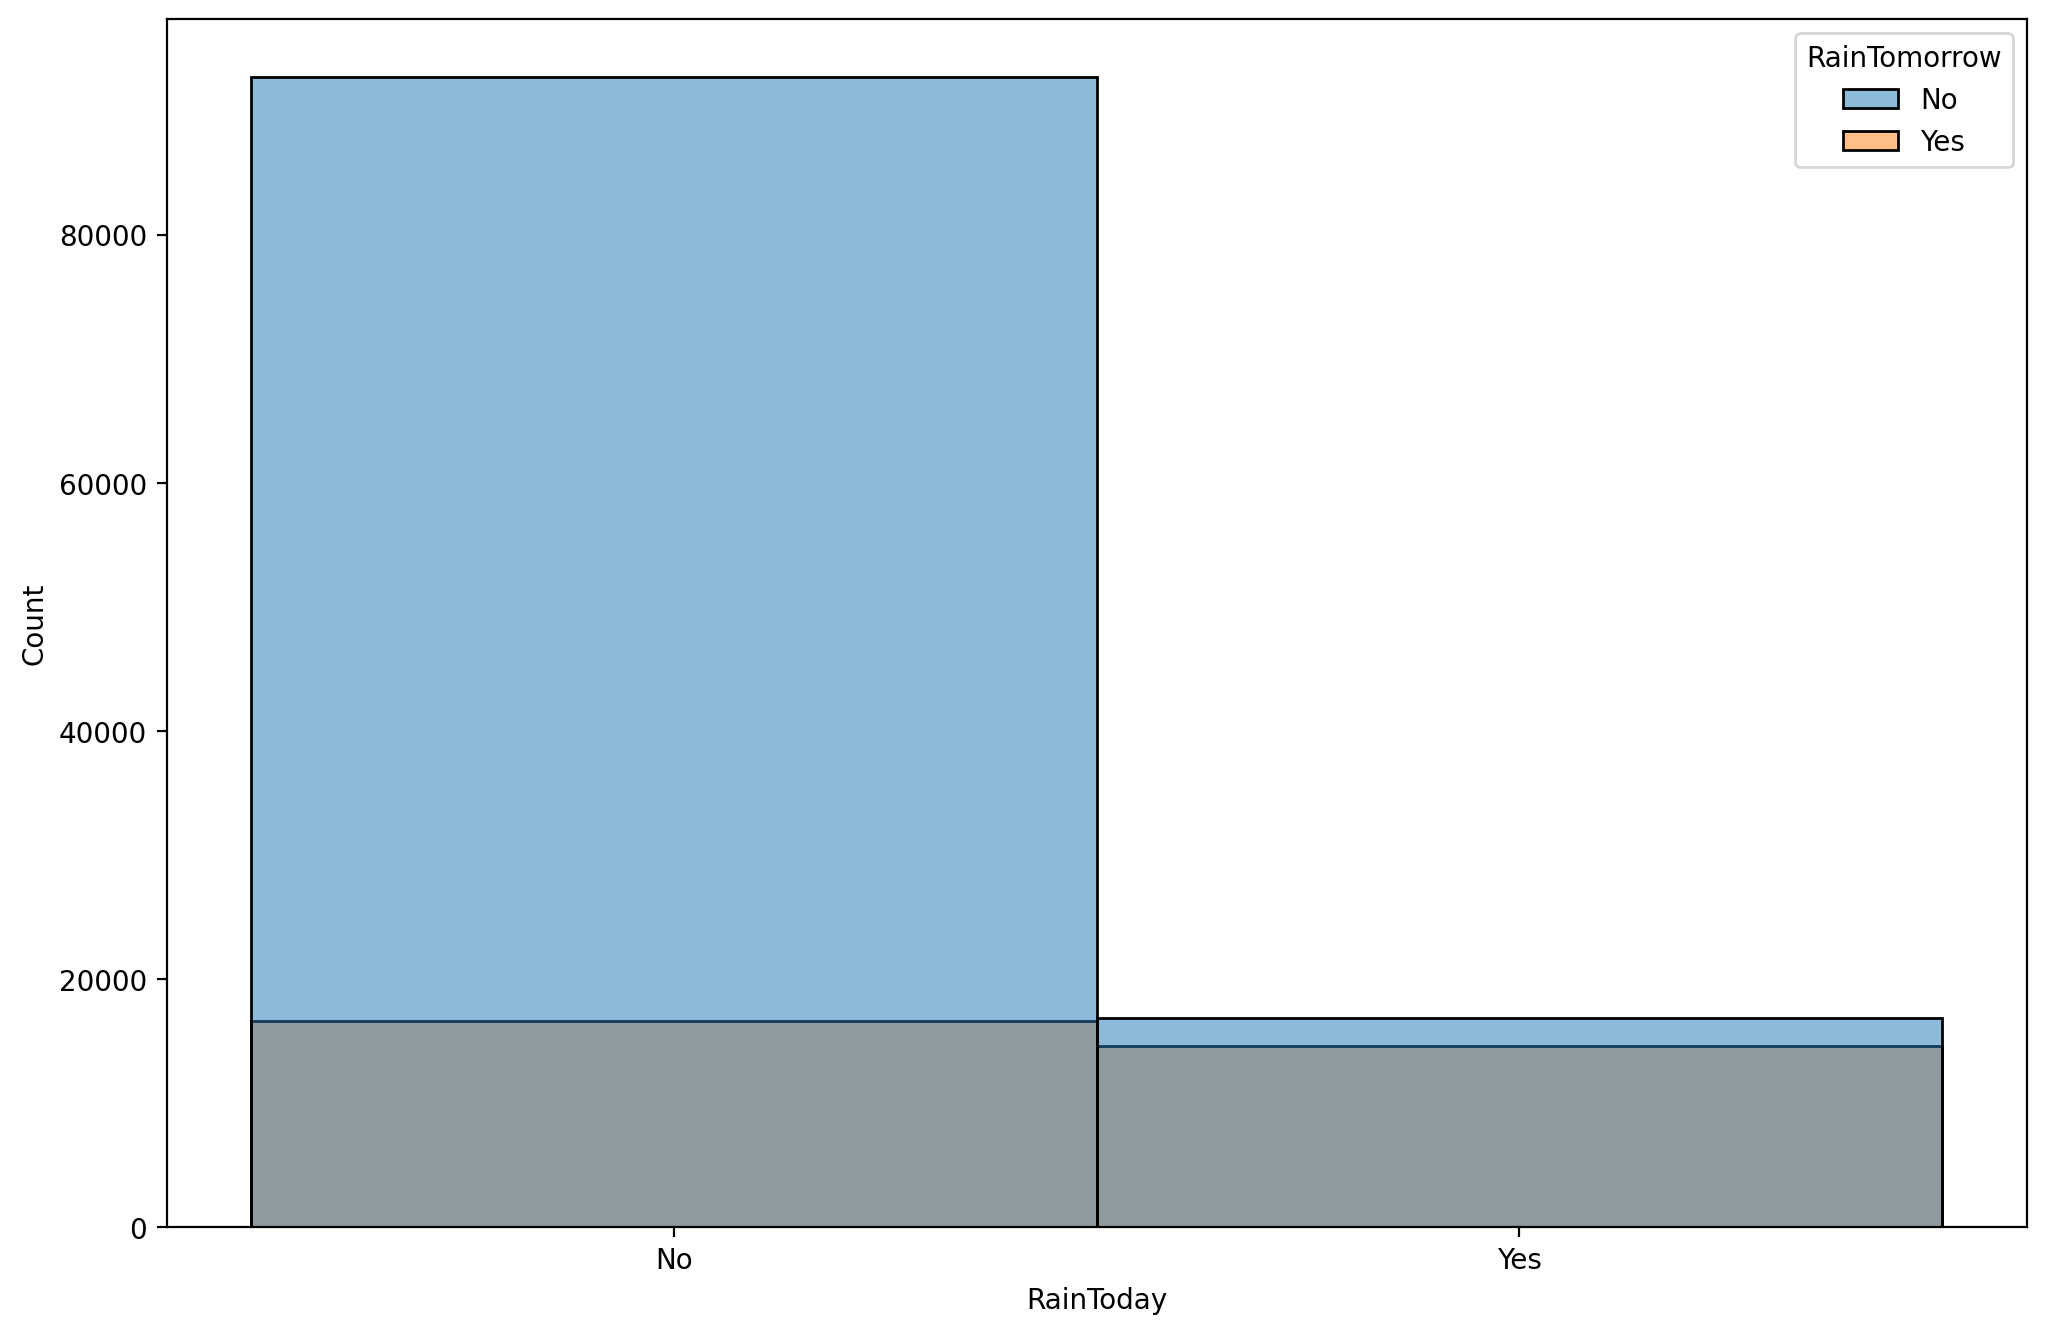

In [10]:
sns.histplot(data=df,x='RainToday',hue='RainTomorrow');

# we can observe from this plot that, there are high chances of Rain Tomorrow, if it Rains Today

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

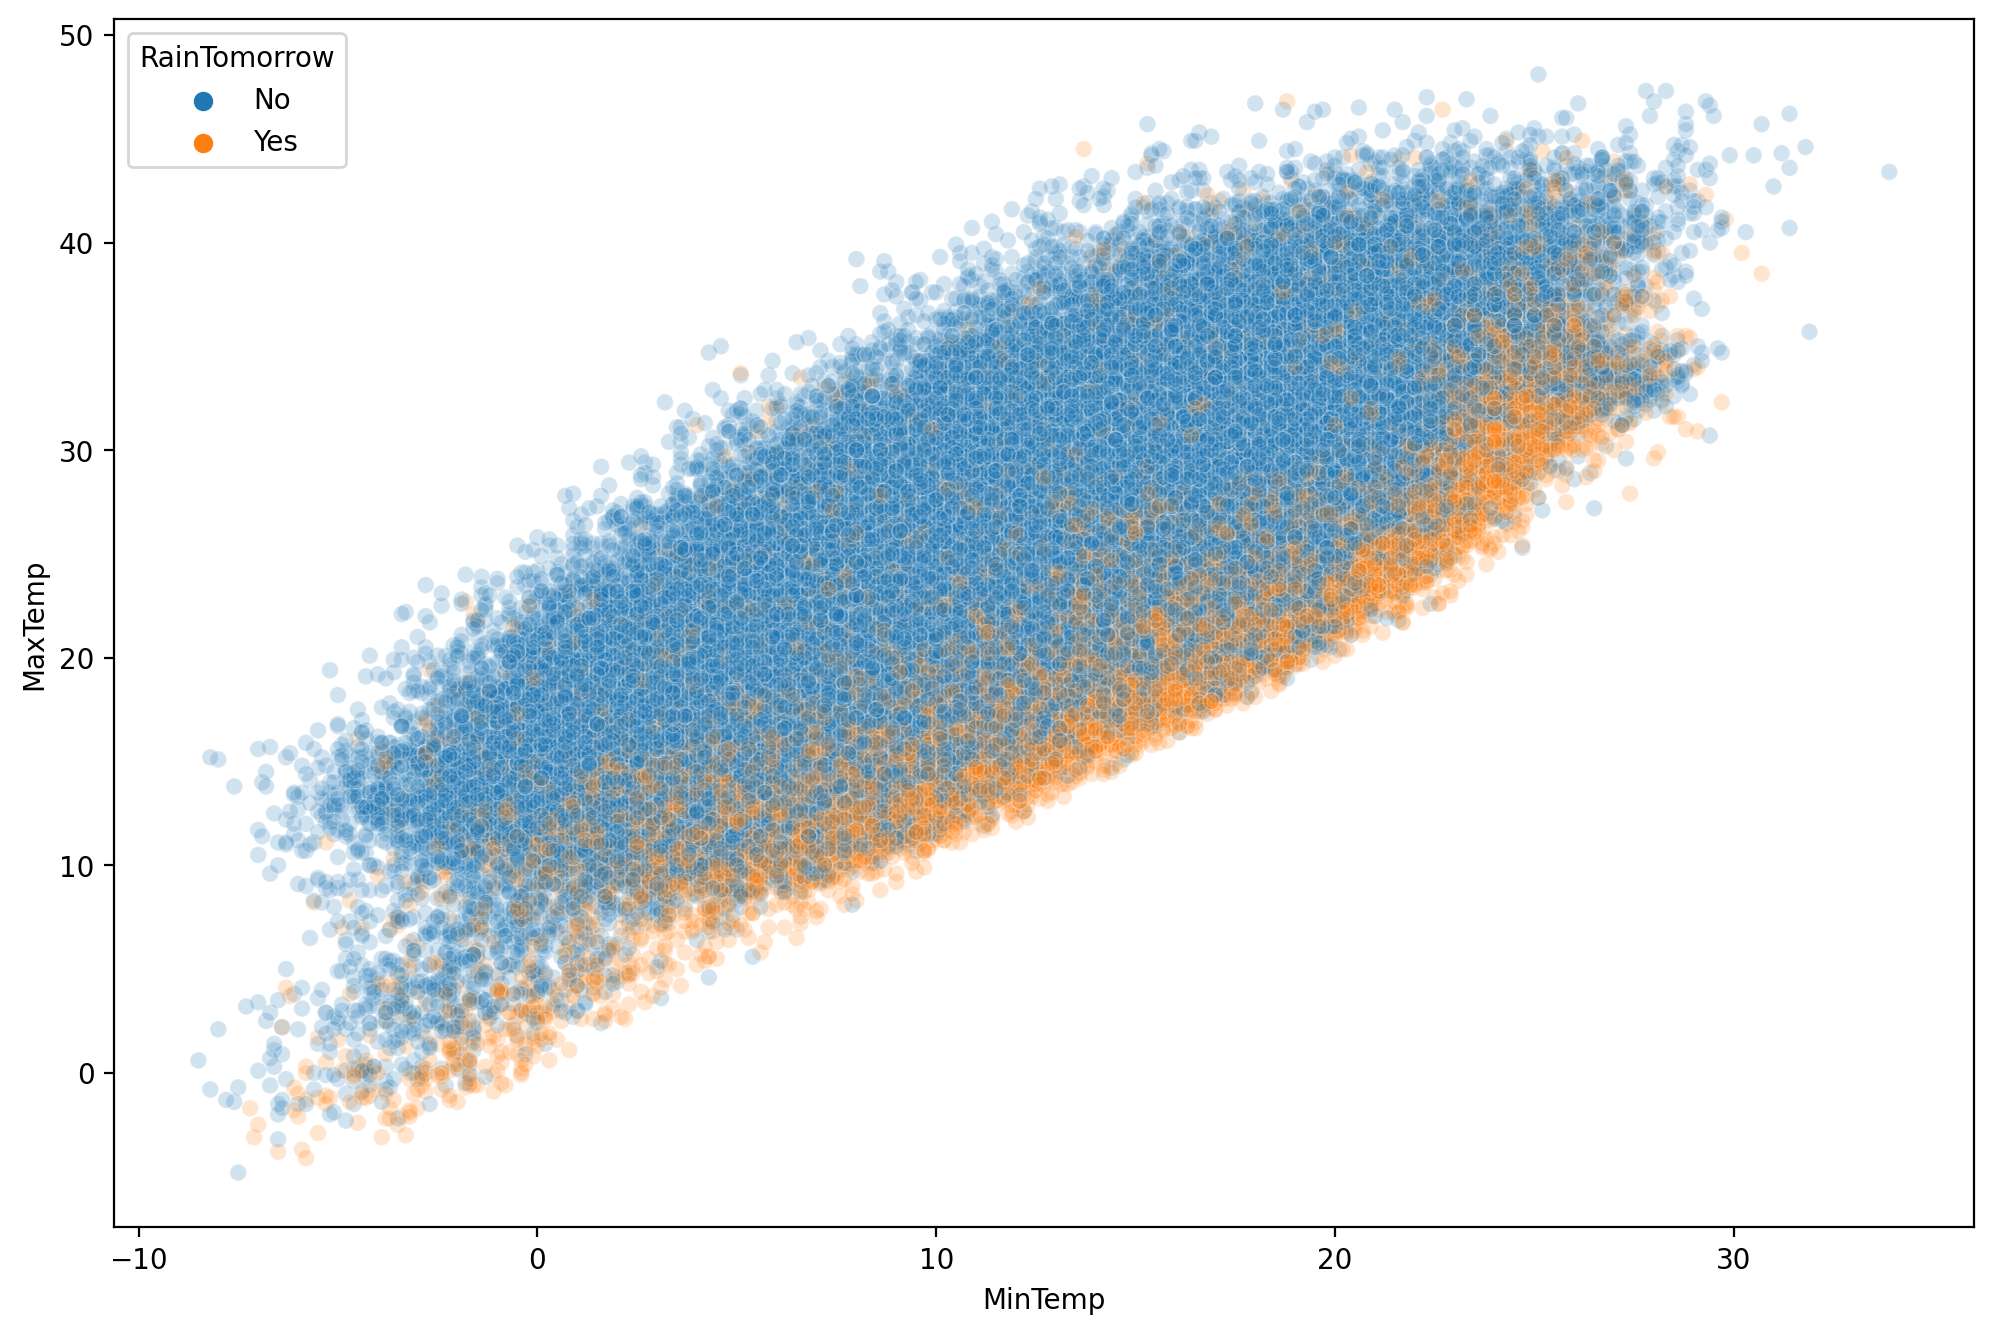

In [11]:
sns.scatterplot(data=df,x='MinTemp',y='MaxTemp',hue='RainTomorrow',alpha=0.2)


In [12]:
X = df.drop('RainTomorrow',axis=1)   # without target column, i.e., only input features

In [13]:
y = df['RainTomorrow']   # target column 

In [14]:
X.shape

(142193, 22)

In [15]:
df.shape

(142193, 23)

In [16]:
X.shape

(142193, 22)

In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [19]:
df.shape

(142193, 23)

In [20]:
X.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

In [21]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [22]:
# separate categorical columns and numerical columns into separate datasets and then merge later

In [23]:
X_numerical = X.select_dtypes(include=[np.number])
X_categorical = X.select_dtypes(exclude=[np.number])

In [24]:
X_numerical.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [25]:
X_categorical.isnull().sum()

Date               0
Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

In [26]:
X_numerical.shape

(142193, 16)

In [27]:
X_categorical.shape

(142193, 6)

In [28]:
X_categorical.nunique()

Date           3436
Location         49
WindGustDir      16
WindDir9am       16
WindDir3pm       16
RainToday         2
dtype: int64

In [29]:
X_categorical = X_categorical.drop('Date',axis=1)

In [30]:
X_categorical.shape

(142193, 5)

In [31]:
X_numerical.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989


In [32]:
# For simplicity, lets replace all the NaN values with Median value of that column using SimpleImputer

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(missing_values=np.nan,strategy='median')

In [35]:
imputer.fit(X_numerical)

SimpleImputer(strategy='median')

In [36]:
X_numerical_imputed = imputer.transform(X_numerical)

In [37]:
X_numerical_imputed.shape

(142193, 16)

In [38]:
type(X_numerical_imputed)

numpy.ndarray

In [39]:
X_numerical_imputed= pd.DataFrame(X_numerical_imputed,columns=X_numerical.columns)

In [40]:
type(X_numerical_imputed)

pandas.core.frame.DataFrame

In [41]:
X_numerical_imputed

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.8,8.5,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9
142189,2.8,23.4,0.0,4.8,8.5,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4
142190,3.6,25.3,0.0,4.8,8.5,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5
142191,5.4,26.9,0.0,4.8,8.5,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1


In [42]:
# lets create one-hot encoding of categorical columns

from sklearn.preprocessing import OneHotEncoder

In [43]:
encoder = OneHotEncoder(sparse=False,drop='if_binary',handle_unknown='ignore')

In [44]:
encoder.fit(X_categorical)

OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)

In [45]:
X_categorical_encoded = encoder.transform(X_categorical)

In [46]:
X_categorical_encoded.shape

(142193, 103)

In [47]:
encoded_column_names = encoder.get_feature_names_out(X_categorical.columns)

In [48]:
X_categorical_encoded = pd.DataFrame(X_categorical_encoded,columns=encoded_column_names)

In [49]:
X_numerical_imputed.isnull().sum()    # no null values in numerical columns

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [50]:
X_categorical_encoded.isnull().sum()

Location_Adelaide         0
Location_Albany           0
Location_Albury           0
Location_AliceSprings     0
Location_BadgerysCreek    0
                         ..
WindDir3pm_WSW            0
WindDir3pm_nan            0
RainToday_No              0
RainToday_Yes             0
RainToday_nan             0
Length: 103, dtype: int64

In [51]:
# lets scale the numerical columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_numerical_imputed)
X_numerical_imputed = scaler.transform(X_numerical_imputed)

In [52]:
X_numerical_imputed= pd.DataFrame(X_numerical_imputed,columns=X_numerical.columns)

In [53]:
X_numerical_imputed.shape

(142193, 16)

In [54]:
X_categorical_encoded.shape

(142193, 103)

In [55]:
# now we have X (i/p features) in two dataframes: 
    # X_numerical_imputed: one with numerical cols (NaN replaced by median) and
    # X_categorical_encoded: one with encoded categorical cols
    
# lets merge both into a single dataframe for further steps

In [56]:
X_final = pd.concat([X_numerical_imputed,X_categorical_encoded],axis=1)

In [57]:
X_final.shape

(142193, 119)

In [58]:
X_final.isnull().sum().sum()    # no null values

0

In [59]:
# now our data is ready... lets split the data now

from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42)

# Machine Learning Models

In [61]:
# lets create a basic logistic regression model, later we will optimize with different hyperparameters and other ML models

from sklearn.linear_model import LogisticRegression

In [62]:
base_logit = LogisticRegression()

In [63]:
base_logit.fit(X_train,y_train)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pred_base_logit = base_logit.predict(X_test)

In [65]:
y_test

57760     Yes
127128     No
119994     No
7088       No
62992     Yes
         ... 
59458     Yes
73138      No
35876      No
59558      No
44133      No
Name: RainTomorrow, Length: 28439, dtype: object

In [66]:
y_pred_base_logit

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [67]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

In [68]:
accuracy_score(y_test, y_pred_base_logit)

0.8463729385702732

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


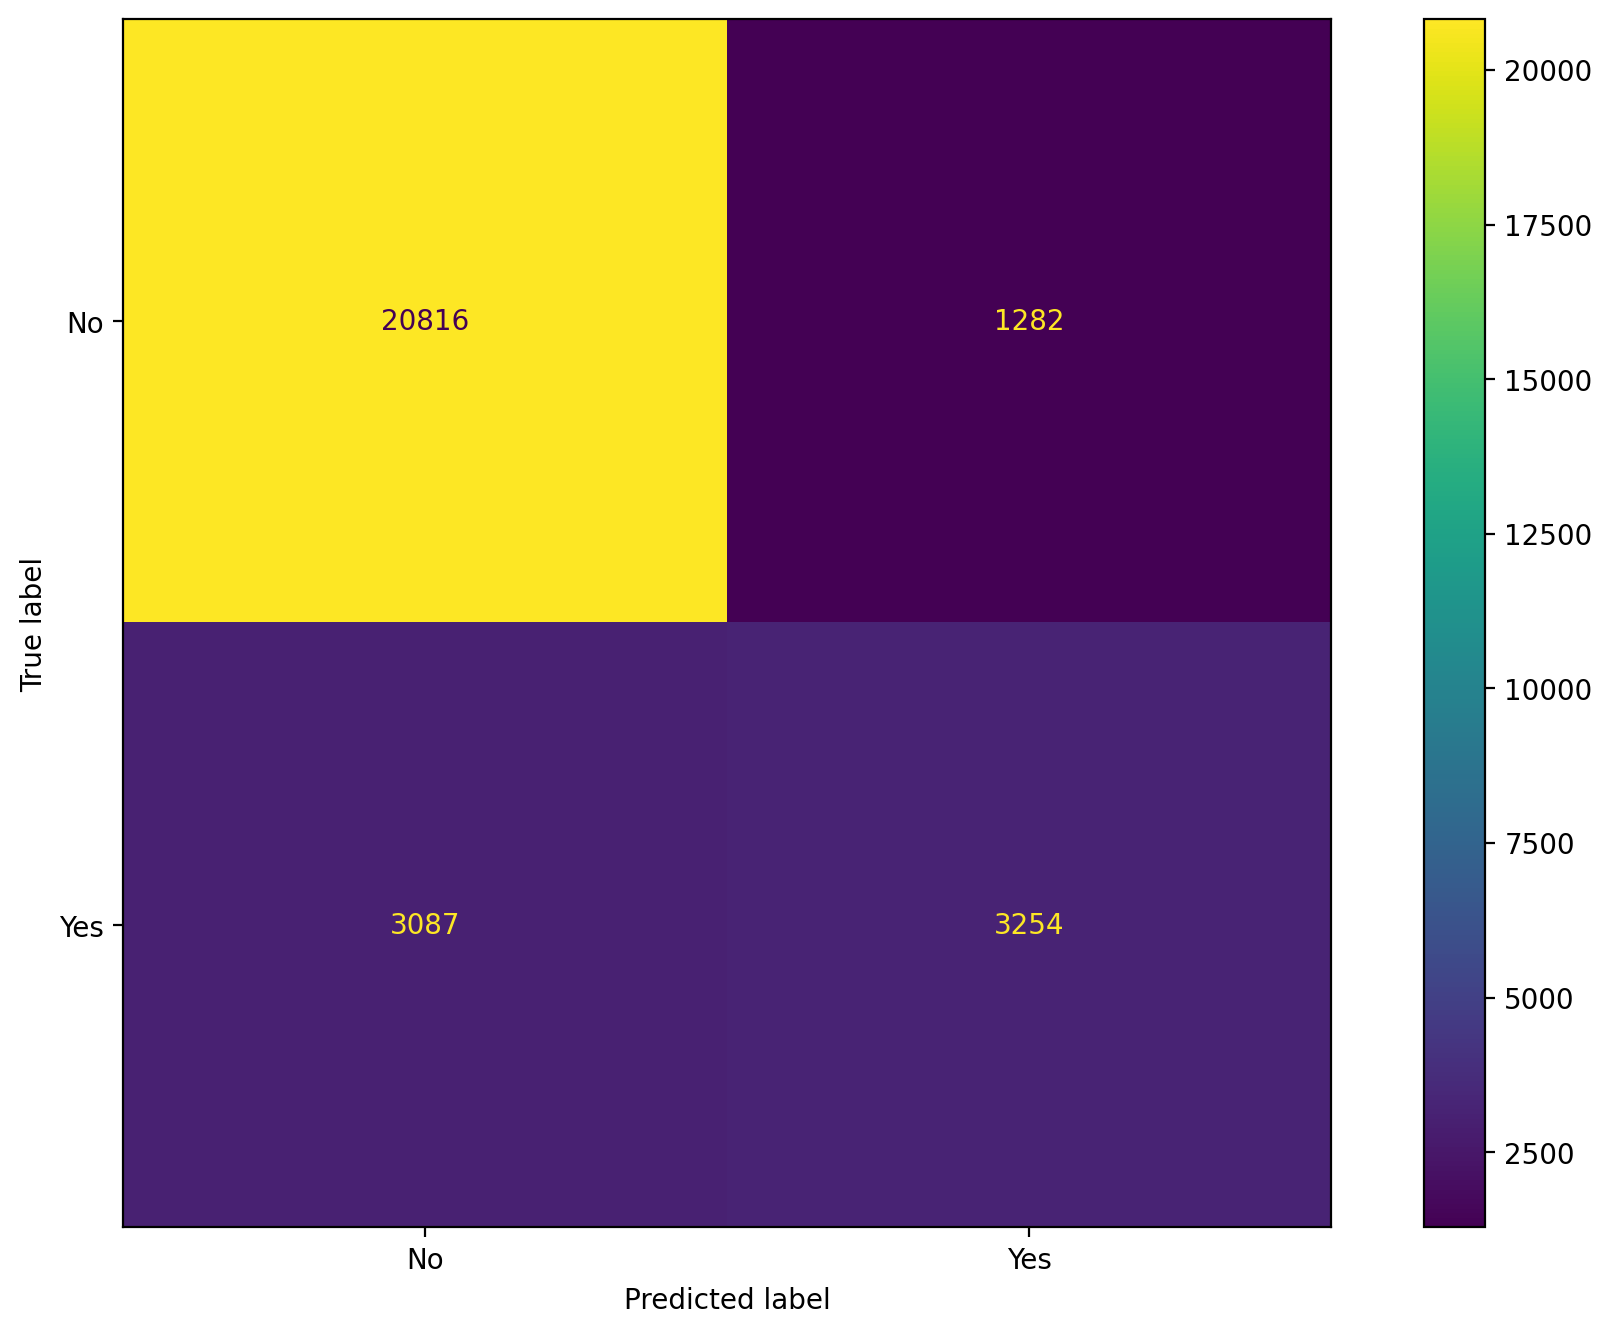

In [69]:
plot_confusion_matrix(base_logit, X_test, y_test)

In [70]:
print(classification_report(y_test,y_pred_base_logit))

              precision    recall  f1-score   support

          No       0.87      0.94      0.91     22098
         Yes       0.72      0.51      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.79      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439



## Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt_model = DecisionTreeClassifier()

# basic model

In [74]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
y_pred_dt = dt_model.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred_dt)

0.7909912444178768

## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# basic random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_pred_rf = rf_model.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred_rf)

0.8528429269664897

## Random Forest with GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
n_estimators = [64,100,128,200] # no. of decision trees

max_features = [2,3,4]  # maximum no.of features in each random selection

bootstrap = [True,False]

oob_score = [True,False] # used when bootstrap=True

param_grid = {'n_estimators':n_estimators, 'max_features':max_features,
             'bootstrap':bootstrap,'oob_score':oob_score}

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_model = RandomForestClassifier()

In [87]:
grid_rf = GridSearchCV(rf_model,param_grid)

In [88]:
grid_rf.fit(X_train,y_train)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [89]:
y_pred_rf_grid = grid_rf.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred_rf_grid)

0.8540736312809873

In [96]:
accuracy_score(y_train, grid_rf.predict(X_train))

0.9999648364013574

# Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
gb_model = GradientBoostingClassifier()

In [93]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [94]:
y_pred_gb = gb_model.predict(X_test)

In [95]:
accuracy_score(y_test, y_pred_gb)

0.8473223390414572

# Conclusion:

Different ML algorithms are used to predict whether it would Rain Tomorrow or not in Australia based on a dataset downloaded from Kaggle. 

Grid Search is used to find the optimum hyderparameter values for Random Forests.

An accuracy around 85% is achieved using Logistic Regression, Random Forests or Gradient Boosting models. 